In [33]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen

tickers = ["^GSPC", "^DJI", "^IXIC", "^NYA", "^XAX", "^RUT", "^FTSE", "^GDAXI", "^FCHI", "^N100", "^BFX", "^N225", "^HSI", "000001.SS", "399001.SZ", "^STI", "^AXJO", "^AORD", "^BSESN", "^JKSE", "^KLSE",  "^KS11", "^TWII", "^GSPTSE", "^BVSP", "^MXX", "^MERV"]
START_DATE = "2010-01-01"
END_DATE = "2018-01-20"

all_data = yf.download(tickers, start=START_DATE, end=END_DATE)
close_data = pd.DataFrame(all_data['Close'])

# save the dataframe to a CSV file
# close_data.to_csv('close_data.csv')

[*********************100%***********************]  27 of 27 completed


In [34]:
close_data

,000001.SS,399001.SZ,^AORD,^AXJO,^BFX,^BSESN,^BVSP,^DJI,^FCHI,^FTSE,...,^KS11,^MERV,^MXX,^N100,^N225,^NYA,^RUT,^STI,^TWII,^XAX
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,3243.760010,13533.540039,4889.799805,4876.299805,2563.969971,17558.730469,70045.0,10583.959961,4013.969971,5500.299805,...,1696.140015,2384.500000,32758.529297,696.989990,10654.790039,7326.740234,640.099976,2894.550049,8207.849609,1853.660034
2010-01-05,3282.178955,13517.379883,4939.500000,4924.299805,2587.770020,17686.240234,70240.0,10572.019531,4012.909912,5522.500000,...,1690.619995,2401.800049,32732.759766,697.570007,10681.830078,7354.870117,638.489990,2920.280029,8211.400391,1859.920044
2010-01-06,3254.215088,13505.179688,4946.799805,4921.399902,2596.429932,17701.130859,70729.0,10573.679688,4017.669922,5530.000000,...,1705.319946,2362.500000,32830.160156,698.270020,10731.450195,7377.700195,637.950012,2930.489990,8327.620117,1866.900024
2010-01-07,3192.775879,13235.480469,4930.500000,4899.399902,2590.679932,17615.720703,70451.0,10606.860352,4024.800049,5526.700195,...,1683.449951,2389.500000,33064.570312,697.760010,10681.660156,7393.930176,641.969971,2913.250000,8237.419922,1868.020020
2010-01-08,3195.997070,13267.440430,4942.200195,4912.100098,2591.639893,17540.289062,70263.0,10618.190430,4045.139893,5534.200195,...,1695.260010,2352.800049,32892.039062,701.380005,10798.320312,7425.350098,644.559998,2922.760010,8280.900391,1872.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-15,3410.488037,11307.459961,6187.700195,6077.100098,4164.450195,34843.511719,79752.0,NaN,5509.689941,7769.100098,...,2503.729980,33622.800781,49387.281250,1066.500000,23714.880859,NaN,NaN,3536.409912,10956.309570,NaN
2018-01-16,3436.593994,11386.910156,6165.899902,6048.600098,4163.959961,34771.050781,79832.0,25792.859375,5513.819824,7755.899902,...,2521.739990,33521.601562,49491.718750,1067.849976,23951.810547,13246.860352,1572.969971,3550.209961,10986.110352,2699.489990
2018-01-17,3444.670898,11303.969727,6134.299805,6015.799805,4148.600098,35081.820312,81189.0,26115.650391,5493.990234,7725.399902,...,2515.429932,33598.199219,49732.300781,1066.479980,23868.339844,13352.389648,1586.660034,3541.909912,11004.799805,2714.929932


In [35]:
close_data = close_data.dropna()
close_data


,000001.SS,399001.SZ,^AORD,^AXJO,^BFX,^BSESN,^BVSP,^DJI,^FCHI,^FTSE,...,^KS11,^MERV,^MXX,^N100,^N225,^NYA,^RUT,^STI,^TWII,^XAX
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,3243.760010,13533.540039,4889.799805,4876.299805,2563.969971,17558.730469,70045.0,10583.959961,4013.969971,5500.299805,...,1696.140015,2384.500000,32758.529297,696.989990,10654.790039,7326.740234,640.099976,2894.550049,8207.849609,1853.660034
2010-01-05,3282.178955,13517.379883,4939.500000,4924.299805,2587.770020,17686.240234,70240.0,10572.019531,4012.909912,5522.500000,...,1690.619995,2401.800049,32732.759766,697.570007,10681.830078,7354.870117,638.489990,2920.280029,8211.400391,1859.920044
2010-01-06,3254.215088,13505.179688,4946.799805,4921.399902,2596.429932,17701.130859,70729.0,10573.679688,4017.669922,5530.000000,...,1705.319946,2362.500000,32830.160156,698.270020,10731.450195,7377.700195,637.950012,2930.489990,8327.620117,1866.900024
2010-01-07,3192.775879,13235.480469,4930.500000,4899.399902,2590.679932,17615.720703,70451.0,10606.860352,4024.800049,5526.700195,...,1683.449951,2389.500000,33064.570312,697.760010,10681.660156,7393.930176,641.969971,2913.250000,8237.419922,1868.020020
2010-01-08,3195.997070,13267.440430,4942.200195,4912.100098,2591.639893,17540.289062,70263.0,10618.190430,4045.139893,5534.200195,...,1695.260010,2352.800049,32892.039062,701.380005,10798.320312,7425.350098,644.559998,2922.760010,8280.900391,1872.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-12,3428.940918,11461.990234,6176.799805,6070.100098,4164.120117,34592.390625,79349.0,25803.189453,5517.060059,7778.600098,...,2496.419922,32719.699219,49135.910156,1066.790039,23653.820312,13294.320312,1591.969971,3520.560059,10883.959961,2688.060059
2018-01-16,3436.593994,11386.910156,6165.899902,6048.600098,4163.959961,34771.050781,79832.0,25792.859375,5513.819824,7755.899902,...,2521.739990,33521.601562,49491.718750,1067.849976,23951.810547,13246.860352,1572.969971,3550.209961,10986.110352,2699.489990
2018-01-17,3444.670898,11303.969727,6134.299805,6015.799805,4148.600098,35081.820312,81189.0,26115.650391,5493.990234,7725.399902,...,2515.429932,33598.199219,49732.300781,1066.479980,23868.339844,13352.389648,1586.660034,3541.909912,11004.799805,2714.929932


In [36]:
from sklearn.cluster import OPTICS
from sklearn import preprocessing

# Fit the OPTICS model
XS = preprocessing.StandardScaler().fit_transform(close_data.values).transpose()
clustering = OPTICS(min_samples=2, xi=.05, min_cluster_size=.05)
clustering.fit(XS)
 
# Extract the clusters
labels = clustering.labels_
 
# Print the cluster labels
print("Cluster Labels:", labels)

Cluster Labels: [ 0  0  4  4  1 -1 -1  2  1 -1 -1  2  5 -1  2 -1 -1 -1  4 -1  1 -1  3  3
 -1  5 -1]


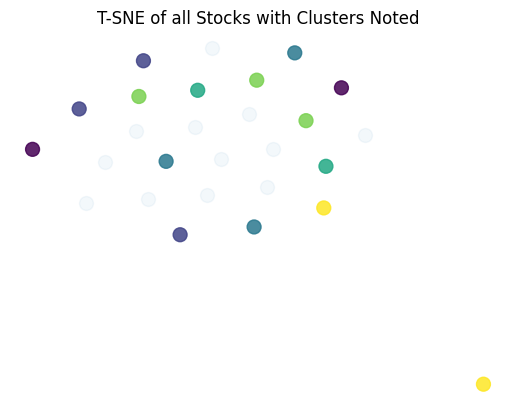

In [37]:
import pandas as pd
from sklearn.manifold import TSNE #for visualization

clustered_series = pd.Series(index=close_data.columns, data=labels)
clustered_series_all = pd.Series(index=close_data.columns, data=labels)
clustered_series = clustered_series[clustered_series != -1]
X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(XS)

plt.figure(1, facecolor='white')
plt.clf()
plt.axis('off')

plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1]
)

plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=100,
    alpha=0.05
)

plt.title('T-SNE of all Stocks with Clusters Noted');

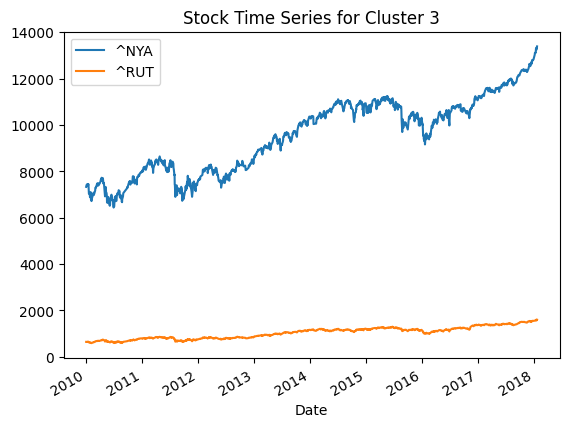

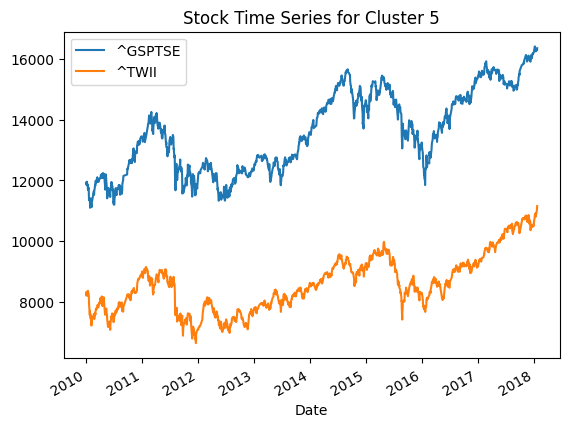

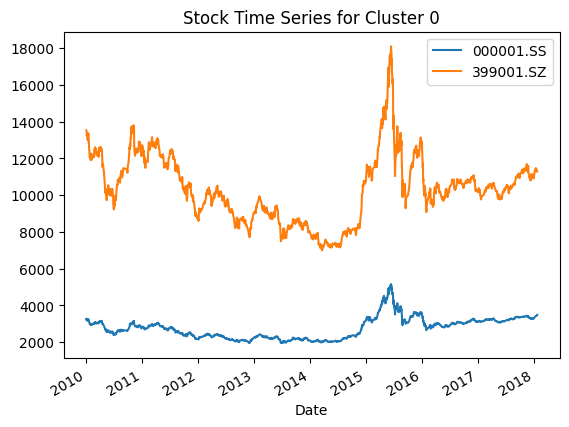

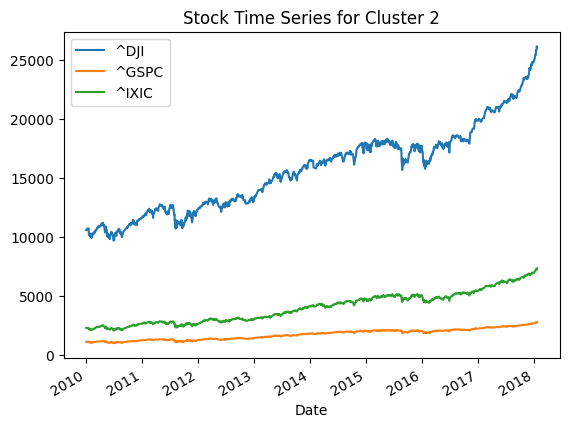

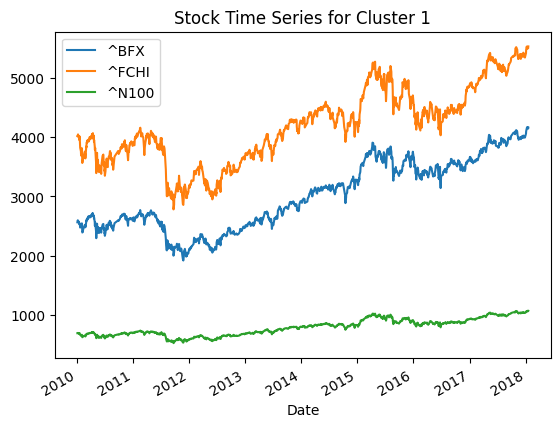

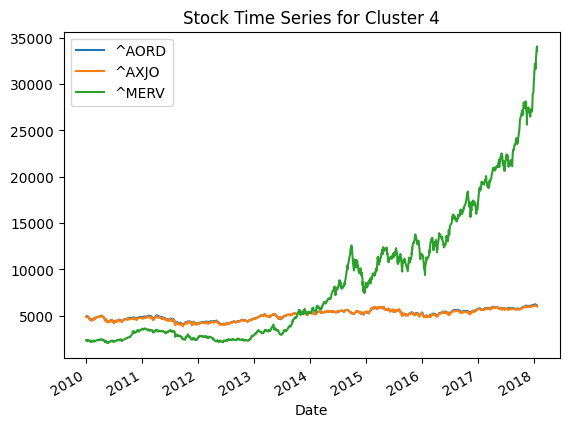

In [38]:
# get the number of stocks in each cluster
counts = clustered_series.value_counts()

# let's visualize some clusters
cluster_vis_list = list(counts[(counts>1)].index)[::-1]

# plot a handful of the smallest clusters
for clust in cluster_vis_list:
    tickers = list(clustered_series[clustered_series==clust].index)
    df = close_data[tickers]
    df.plot(title='Stock Time Series for Cluster %d' % clust)

In [39]:
cluster_vis_list = list(counts[(counts>1)].index)[::-1]
cluster_vis_list

[3, 5, 0, 2, 1, 4]

In [40]:
import itertools

all_pairs = []

for clust in cluster_vis_list:
    tickers = list(clustered_series[clustered_series==clust].index)
    pairs = list(itertools.combinations(tickers, 2))
    for pair in pairs:
        all_pairs.append(pair)

print(all_pairs)

[('^NYA', '^RUT'), ('^GSPTSE', '^TWII'), ('000001.SS', '399001.SZ'), ('^DJI', '^GSPC'), ('^DJI', '^IXIC'), ('^GSPC', '^IXIC'), ('^BFX', '^FCHI'), ('^BFX', '^N100'), ('^FCHI', '^N100'), ('^AORD', '^AXJO'), ('^AORD', '^MERV'), ('^AXJO', '^MERV')]


In [41]:

import pandas as pd

df_dff = pd.read_csv("DFF_fred_2010.csv")
df_dff

,DATE,DFF
0,2009-01-09,0.09
1,2009-01-10,0.09
2,2009-01-11,0.09
3,2009-01-12,0.10
4,2009-01-13,0.10
...,...,...
4034,2020-01-26,1.55
4035,2020-01-27,1.55
4036,2020-01-28,1.55
4037,2020-01-29,1.55


In [42]:
def create_pair_df(tickers):
    merged_df = pd.merge(close_data[tickers], df_dff, left_index=True, right_index=True)
    return merged_df

In [45]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def train_pair(df):# Split the data into features and target
    X = df.drop('DFF', axis=1)
    y = df['DFF']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit an SVR model to the data
    model = make_pipeline(StandardScaler(), SVR(kernel='rbf',C= 10,epsilon=0.5, gamma= 2))
    model.fit(X_train, y_train)

    # Predict the target using the model
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    in_sample_r2 = r2_score(y_train, model.predict(X_train))
    out_sample_r2 = r2_score(y_test,model.predict(X_test))

    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("In sample R-Squared:", in_sample_r2)
    print("Out sample R-Squared:", out_sample_r2)
            
    # Dickey Fuller stationarity test
    result = adfuller(y_pred)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %.17f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
        
    #johansen test
    result_johasen = coint_johansen(X, det_order=0, k_ar_diff=1)
    
    print("Trace statistic:", result_johasen.trace_stat[0])
    print("Critical values:")
    print(result_johasen.trace_stat_crit_vals)
        
    return result[1]


In [50]:
df_dff.index = pd.to_datetime(df_dff['DATE'])
df_dff = df_dff.drop(columns=['DATE'])
merged_df = pd.merge(close_data[['^NYA', '^RUT']], df_dff, left_index=True, right_index=True)
merged_df


,^NYA,^RUT,DFF
2010-01-04,7326.740234,640.099976,0.12
2010-01-05,7354.870117,638.489990,0.12
2010-01-06,7377.700195,637.950012,0.12
2010-01-07,7393.930176,641.969971,0.10
2010-01-08,7425.350098,644.559998,0.11
...,...,...,...
2018-01-12,13294.320312,1591.969971,1.42
2018-01-16,13246.860352,1572.969971,1.42
2018-01-17,13352.389648,1586.660034,1.42
2018-01-18,13315.910156,1576.729980,1.42


In [51]:
p_values = []
for pair in all_pairs:
    tickers = list(pair)
    print(tickers)
    df = create_pair_df(tickers)
    print(df)
    p_value = train_pair(df)
    p_values.append((tickers, p_value))
    print('\n')


['^NYA', '^RUT']
                    ^NYA         ^RUT   DFF
2010-01-04   7326.740234   640.099976  0.12
2010-01-05   7354.870117   638.489990  0.12
2010-01-06   7377.700195   637.950012  0.12
2010-01-07   7393.930176   641.969971  0.10
2010-01-08   7425.350098   644.559998  0.11
...                  ...          ...   ...
2018-01-12  13294.320312  1591.969971  1.42
2018-01-16  13246.860352  1572.969971  1.42
2018-01-17  13352.389648  1586.660034  1.42
2018-01-18  13315.910156  1576.729980  1.42
2018-01-19  13384.459961  1597.630005  1.42

[1307 rows x 3 columns]
Mean Squared Error: 0.16447570097660208
Mean Absolute Error: 0.3884234493352091
In sample R-Squared: -0.560633723040534
Out sample R-Squared: -0.6472044440013889
ADF Statistic: -15.732142
p-value: 0.00000000000000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
Trace statistic: 14.552979841960271
Critical values:
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


['^GSPTSE', '^TWII']
                 ^GSPTSE    

In [52]:
p_values.sort(key=lambda x: x[1])
for pair, p_value in p_values:
    print(pair, p_value)

['^BFX', '^N100'] 1.208336833509001e-29
['^BFX', '^FCHI'] 2.325819165893727e-29
['^AORD', '^MERV'] 5.294444219747273e-29
['^AORD', '^AXJO'] 5.477586743620463e-29
['^DJI', '^IXIC'] 5.56755003805528e-29
['^FCHI', '^N100'] 5.644208122338407e-29
['^AXJO', '^MERV'] 6.121429296222081e-29
['^DJI', '^GSPC'] 6.487472893002506e-29
['^GSPTSE', '^TWII'] 7.588653090873029e-29
['^GSPC', '^IXIC'] 8.103074664673708e-29
['^NYA', '^RUT'] 1.2855764461024023e-28
['000001.SS', '399001.SZ'] 4.656665313062327e-28
